# Project: No-show appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will analyze Medical Appointment No Shows data. The patient showing up or not will be the dependent variable. 

Note that:
1. ‘ScheduledDay’ tells us on what day the patient set up their appointment.
2. ‘Neighborhood’ indicates the location of the hospital.
3. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
4. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



I will explore the following questions:

1. is gender associated with no-show?
2. is age associated with no-show?
3. is SMS reminder helpful for appointment show up?
4. is days waiting associated with no-show?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing data. 
PatientId should be int not float.
ScheduledDay and AppointmentDay should be changed to date type

In [4]:
df.duplicated().sum()

0

There is no duplicated data. This data set is very clean.

In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The unique number of `AppointmentID` is more than `PatientId`, which means that some patients made more than on appointments.

In [6]:
print(df['Gender'].unique(),'Gender')
print(df['Scholarship'].unique(),'Scholarship')
print(df['Hipertension'].unique(),'Hipertension')
print(df['Diabetes'].unique(),'Diabetes')
print(df['Alcoholism'].unique(),'Alcoholism')
print(df['Handcap'].unique(),'Handcap')
print(df['SMS_received'].unique(),'SMS_received')
print(df['No-show'].unique(),'No-show')

['F' 'M'] Gender
[0 1] Scholarship
[1 0] Hipertension
[0 1] Diabetes
[0 1] Alcoholism
[0 1 2 3 4] Handcap
[0 1] SMS_received
['No' 'Yes'] No-show


Later I may group the above variables. Check their values to ensure no anomaly. They all look good.

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The `Age` min is -1, which is an error.



### Data Cleaning - Fixing the issues found from above analysis


First, I will fix the data types:

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# First, fix the data types
df['PatientId'] = df['PatientId'].astype(int)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# check the fixed data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int32
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int32(1), int64(8), object(3)
memory usage: 11.4+ MB


Then, I wil remove the data with age < 0 (error)

In [9]:
# remove the age < 0 data

print(df.shape, 'before remove age<0')

df = df[df['Age'] >= 0]

print(df.shape, 'after remove age<0')

(110527, 14) before remove age<0
(110526, 14) after remove age<0


Good, 1 column with age < 0 has been removed. Let's double check again:

In [10]:
df['Age'].min()

0

Also, I want to change the `No-show` values to 0, 1 so later I can calculate the mean.

In [11]:
df['No-show'].replace({'No':0, 'Yes':1}, inplace = True)

In [12]:
df['No-show'].unique()

array([0, 1], dtype=int64)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: is gender associated with no-show?

In [13]:
df.groupby('Gender')['No-show'].mean()

Gender
F    0.203149
M    0.199679
Name: No-show, dtype: float64

The mean values of male and female are very close. Let's visualize them by using pie chart:

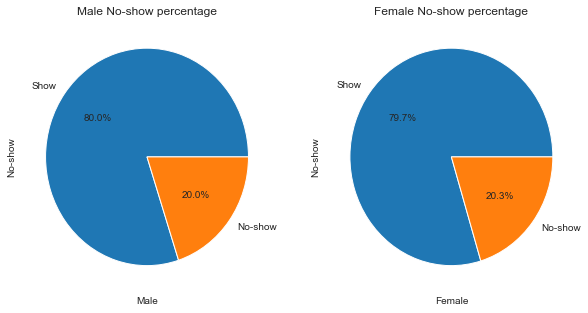

In [14]:
# create masks for genders
male = df['Gender'] == 'M'
female = df['Gender'] == 'F'

# plot pie chart. Remember, 0 means show, 1 means no-show
plt.figure(figsize=(10,5))
plt.subplot(121)
df
df[male]['No-show'].value_counts().plot.pie(labels=['Show', 'No-show'], autopct = '%.1f%%')
plt.xlabel('Male')
plt.title('Male No-show percentage')

plt.subplot(122)
df[female]['No-show'].value_counts().plot.pie(labels=['Show', 'No-show'], autopct = '%.1f%%')
plt.xlabel('Female');
plt.title('Female No-show percentage');


The no-show percentage of different genders are almost the same.

***Conclusion***: Gender is not an important feature to predict no-show

### Research Question 2: is age associated with no-show?

In [15]:
# first calculate the age's descriptive statistics, and group it
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

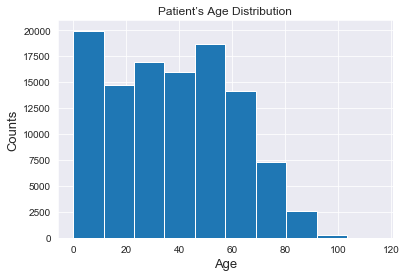

In [16]:
# Visualize the age's distribution

df.Age.hist();
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Counts', fontsize = 13)
plt.title('Patient’s Age Distribution');

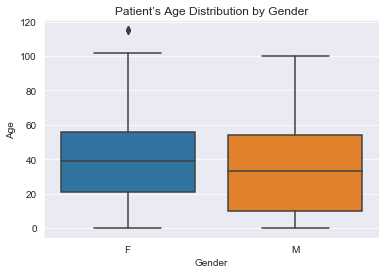

In [17]:
# Visualize age distribution of genders comparisons 

sns.boxplot(y=df['Age'], x= df['Gender']);
plt.title('Patient’s Age Distribution by Gender');

The age is distributed quite evenly from 0 – 70. 
The male’s and female’s maximum ages are very close. Their Q1, median and Q3 are slightly different. However, from previous analysis we learn that gender is not an important predictor. So it is ok to analyze the age without grouping by gender. 

In [18]:
age_range = [0, 18, 37, 55, 115]
age_names = ['0_18','18_37','37_55','55_115']
df['age_groups'] = pd.cut(df['Age'],age_range, labels = age_names)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_groups
0,-2147483648,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,55_115
1,-2147483648,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,55_115
2,-2147483648,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,55_115
3,-2147483648,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0_18
4,-2147483648,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,55_115


Now we have the age groups, let's visualize each age groups show/no-show counts:

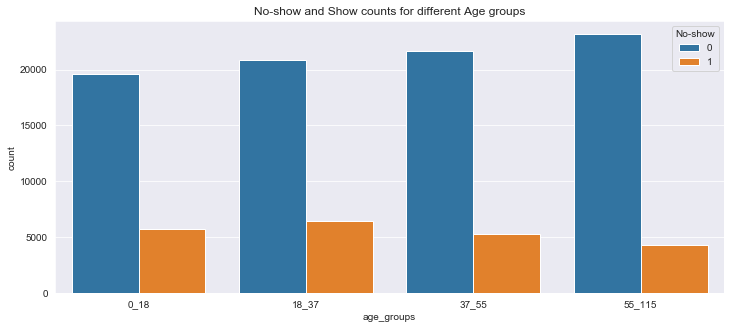

In [19]:
plt.figure(figsize = (12,5));
sns.countplot('age_groups', hue='No-show', data=df)
plt.title('No-show and Show counts for different Age groups');


***Conclusion***: old-aged adults are more likely to not show for the appointments. Age is a factor to predict no-show.

### Research Question 3: is SMS reminder helpful for appointment show up?

In [20]:
df.groupby('SMS_received')['No-show'].mean()

SMS_received
0    0.167035
1    0.275745
Name: No-show, dtype: float64

The group receives the SMS has higher `No-show` mean value, which means more likely to be no-show.
This is very interesting. Let's use pie chart to visualize the data. 

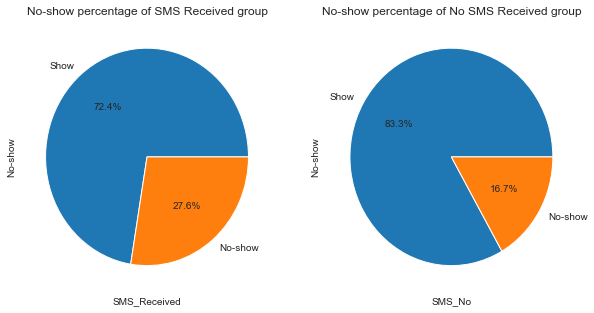

In [21]:
# create masks for SMS_received
SMS_Y = df['SMS_received'] == 1
SMS_N = df['SMS_received'] == 0

# plot pie chart. Remember, 0 means show, 1 means no-show
plt.figure(figsize=(10,5))
plt.subplot(121)
df
df[SMS_Y]['No-show'].value_counts().plot.pie(labels=['Show', 'No-show'], autopct = '%.1f%%')
plt.xlabel('SMS_Received')
plt.title('No-show percentage of SMS Received group')

plt.subplot(122)
df[SMS_N]['No-show'].value_counts().plot.pie(labels=['Show', 'No-show'], autopct = '%.1f%%')
plt.xlabel('SMS_No');
plt.title('No-show percentage of No SMS Received group');

***Conclusion***: SMS received or not is an important feature to predict no-show. Actually SMS reminder increases the no-show possibility.

### Research Question 4: is days waiting associated with no-show?

In [22]:
#remove the time from column 'ScheduledDay'
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_groups
0,-2147483648,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,55_115
1,-2147483648,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,55_115
2,-2147483648,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,55_115
3,-2147483648,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0_18
4,-2147483648,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,55_115


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110526 non-null int32
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null int64
age_groups        106987 non-null category
dtypes: category(1), datetime64[ns](2), int32(1), int64(9), object(2)
memory usage: 17.3+ MB


In [24]:
# Create a column to save the days waiting before the appointment
df['days_wait'] = (df['AppointmentDay'] - df['ScheduledDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_groups,days_wait
0,-2147483648,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,55_115,0 days
1,-2147483648,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,55_115,0 days
2,-2147483648,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,55_115,0 days
3,-2147483648,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0_18,0 days
4,-2147483648,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,55_115,0 days


In [25]:
df['days_wait'].describe()

count                     110526
mean     10 days 04:24:39.789370
std      15 days 06:07:14.979140
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: days_wait, dtype: object

The minimum is -6. We should drop the `days_wait` < 0 before further analysis.

In [26]:
df = df[df['AppointmentDay'] >= df['ScheduledDay']]
df['days_wait'].describe()

count                     110521
mean     10 days 04:25:27.412889
std      15 days 06:07:25.262183
min              0 days 00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: days_wait, dtype: object

Let's split `days_wait` by using the median 4 days, then visualize the 2 groups no-show data

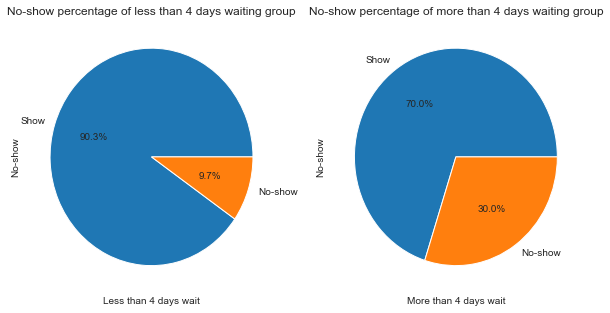

In [27]:
short_days_wait = df['days_wait'] < '4 days'
long_days_wait = df['days_wait'] >= '4 days'

plt.figure(figsize=(10,5))
plt.subplot(121)
df
df[short_days_wait]['No-show'].value_counts().plot.pie(labels=['Show', 'No-show'], autopct = '%.1f%%')
plt.xlabel('Less than 4 days wait')
plt.title('No-show percentage of less than 4 days waiting group');

plt.subplot(122)
df[long_days_wait]['No-show'].value_counts().plot.pie(labels=['Show', 'No-show'], autopct = '%.1f%%')
plt.xlabel('More than 4 days wait');
plt.title('No-show percentage of more than 4 days waiting group');

***Conclusion***: `days_wait` feature I created is an important factor for no-show prediction. Patient with less waiting days are more likely to show up on the appointment. 

<a id='conclusions'></a>
## Conclusions

1. Gender is not an important feature to predict appointment show up possibility.
2. Age is an important feature for no-show prediction. Compared to younger person, elder person are more likely not to show up for their appointment.
3. SMS reminder is an important feature for no-show prediction. Surprisingly, the group received SMS reminder has more no-show percentage. 
4. The waiting days (days between the appointment day and scheduled day) is an important feature for no-show prediction. Patients with less waiting days are very likely to show up for their appointment. 


## Limitations

1. There is one row with Age<0. This is probably a typo so I drop this row. Since it is 1 out of 110527. But we can also predict this age based on other features provided in the data set. 

2.	It surprises me that SMS reminder does not help on appointment show-up. The SMS reminder may correlate with other features (for example, neighborhood, Handicap). Maybe doing an A-B test here can really prove that SMS reminder will increase the no-show possibilities. 

3.	From the early DataFrame unique values we know that number of AppointmentID is much larger than number of PatientID, which means that some patients have more than 1 records in this data set. It is possible that some "bad" patients kept making appointments and never showed up, which introduced some noise to my analysis. I could find those “bad” patients and only keep 1 record for them to have a more accurate analysis. 